# Reguły asocjacyjne - Analiza Koszykowa z wykorzystaniem algorytm Apriori 
### Eksploracja Danych, Informatyka, st.I, sem.V
Piotr Dyba

Aleksandra Kilijańska

Magdalena Góras 


### Analiza koszykowa
Analiza koszykowa, zwana także analizą asocjacyjną, to metoda statystyczna służąca do wykrywania reguł asocjacyjnych między produktami w zbiorze danych dotyczących transakcji zakupów. Polega ona na przeanalizowaniu danych zawierających informacje o tym, jakie produkty zostały kupione w danej transakcji, i na poszukiwaniu wzajemnych powiązań między tymi produktami. Analiza ta pozwala na uzyskanie informacji, jakie produkty często są kupowane razem, co pozwala na lepsze dostosowanie oferty sklepu do potrzeb klientów.

Ogólnie, metoda asocjacyjna pozwala na wykrycie nieoczywistych związków między elementami w zbiorze danych, co pozwala na lepsze zrozumienie zachodzących procesów i na podjęcie lepszych decyzji biznesowych.

### Algorytm Apriori
Algorytm Apriori jest jednym z najczęściej stosowanych algorytmów do analizy koszykowej. Algorytm ten działa na zasadzie "przesuwania progu" częstotliwości występowania danego zestawu produktów.

Działanie algorytmu Apriori:

W celu wyznaczenia wzorca asocjacji, algorytm przeszukuje wszerz bazę transakcyjną, w kolejnych iteracjach generując rodzinę coraz dłuższych częstych zbiorów. Algorytm rozpoczyna działanie od znalezienia wszystkich częstych zbiorów jednoelementowy L1. Następnie L1 jest wykorzystywany do generowania L2 - rodziny częstych zbiorów dwuelementowych, króry z kolei jest używany do generowania L3, itd. aż do momentu, gdy nie ma więcej częstych zbiorów k-elementowych.

Dzięki algorytmowi Apriori, możliwe jest znalezienie związków między produktami, które często są kupowane razem, co pozwala na lepsze zrozumienie zachowań klientów i lepsze dostosowanie oferty sklepu do ich potrzeb.

### Import bibliotek

In [29]:
import numpy as np 
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

### Import danych

In [30]:
with open("groceries.csv", 'r') as temp_f:
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]
    
column_names = [i for i in range(0, max(col_count))]

df = pd.read_csv("groceries.csv", header=None, delimiter=",", names=column_names)

In [31]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,chicken,tropical fruit,other vegetables,vinegar,shopping bags,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transformacja ramki danych w listę list

In [32]:
transactions = df.values.astype(str).tolist()

In [33]:
transactions[:5]

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese',
  'meat spreads',
  'nan'

### Transformacja listy transakcji do binarnej ramki danych


In [34]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df = df.drop(['nan'],axis=1)

In [35]:
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Model Apriori

In [36]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [37]:
frequent_itemsets.count()['itemsets']

333

In [38]:
frequent_itemsets.nlargest(n = 15, columns = 'support')

,support,itemsets
86,0.255516,(whole milk)
55,0.193493,(other vegetables)
66,0.183935,(rolls/buns)
75,0.174377,(soda)
87,0.139502,(yogurt)
6,0.110524,(bottled water)
67,0.108998,(root vegetables)
81,0.104931,(tropical fruit)
73,0.098526,(shopping bags)
70,0.093950,(sausage)


<AxesSubplot:xlabel='itemsets', ylabel='support'>

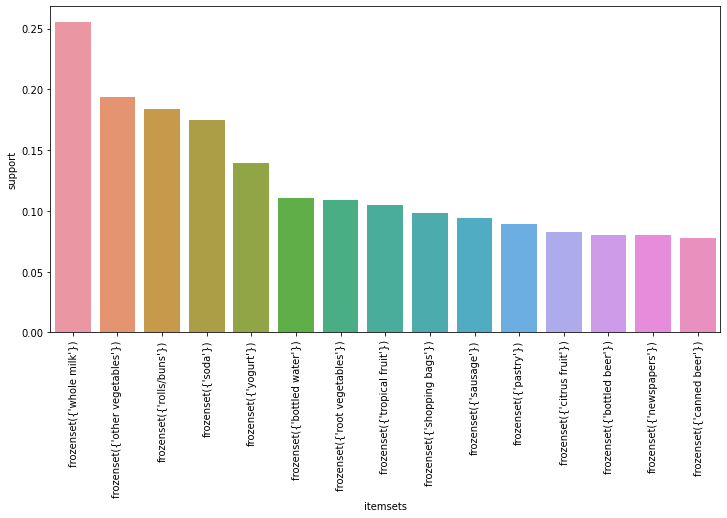

In [39]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x='itemsets', y='support', data=frequent_itemsets.nlargest(n = 15, columns = 'support'))

In [40]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by=['support'], ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
290,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
291,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
346,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
347,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
405,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


Lift mierzy prawdopodobieństwo zakupu przedmiotu przy zakupie innego przedmiotu, kontrolując jednocześnie popularność obu przedmiotów.
Lift wielkości 1 będzie wtedy oznaczał, że obie pozycje są w rzeczywistości niezależne i bez żadnego związku.
Dla dowolnej wartości większej niż 1, Lift pokazuje, że istnieje powiązanie.
Im wyższa wartość, tym wyższe powiązanie.

Leverage to różnica między obserwowaną częstotliwością 'A' i 'B' a oczekiwaną częstotliwością, gdyby 'A' i 'B' były niezależne. Dodatnia Leverage wskazuje na powiązanie.

Convivtion jest obliczane jako (1 - P(B)) / (1 - P(A->B)), które mierzy stosunek oczekiwanej częstotliwości reguły A->B do rzeczywistej częstotliwości reguły A-> B. Wysoka wartość Conviction wskazuje, że wystąpienie A->B jest wysoce nieprawdopodobne.

In [41]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095,1,1
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416,1,1
2,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337,1,1
3,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329,1,1
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,1,1


In [42]:
rules[rules['antecedent_len'] >= 2].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
406,"(bottled water, other vegetables)",(whole milk),0.024809,0.255516,0.010778,0.434426,1.700192,0.004439,1.316334,2,1
407,"(bottled water, whole milk)",(other vegetables),0.034367,0.193493,0.010778,0.313609,1.620783,0.004128,1.174998,2,1
408,"(other vegetables, whole milk)",(bottled water),0.074835,0.110524,0.010778,0.144022,1.303085,0.002507,1.039134,2,1
412,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,2,1
413,"(other vegetables, whole milk)",(butter),0.074835,0.055414,0.011490,0.153533,2.770630,0.007343,1.115915,2,1


In [43]:
rules[rules['consequent_len'] >= 2].sort_values(ascending=False,by ='consequent_len' ).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
409,(bottled water),"(other vegetables, whole milk)",0.110524,0.074835,0.010778,0.097516,1.303085,0.002507,1.025132,1,2
410,(other vegetables),"(bottled water, whole milk)",0.193493,0.034367,0.010778,0.055702,1.620783,0.004128,1.022593,1,2
548,(yogurt),"(other vegetables, whole milk)",0.139502,0.074835,0.022267,0.159621,2.132979,0.011828,1.100890,1,2
547,(other vegetables),"(yogurt, whole milk)",0.193493,0.056024,0.022267,0.115081,2.054131,0.011427,1.066737,1,2
543,(yogurt),"(other vegetables, whipped/sour cream)",0.139502,0.028876,0.010168,0.072886,2.524073,0.006139,1.047470,1,2


In [44]:
rules[rules['antecedent_len'] >= 2].sort_values(ascending=False,by ='antecedent_len' ).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
406,"(bottled water, other vegetables)",(whole milk),0.024809,0.255516,0.010778,0.434426,1.700192,0.004439,1.316334,2,1
407,"(bottled water, whole milk)",(other vegetables),0.034367,0.193493,0.010778,0.313609,1.620783,0.004128,1.174998,2,1
545,"(other vegetables, whole milk)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,0.011828,1.225003,2,1
544,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,2,1
540,"(whipped/sour cream, yogurt)",(other vegetables),0.020742,0.193493,0.010168,0.490196,2.533410,0.006154,1.581995,2,1


![](nojigit.jpeg)
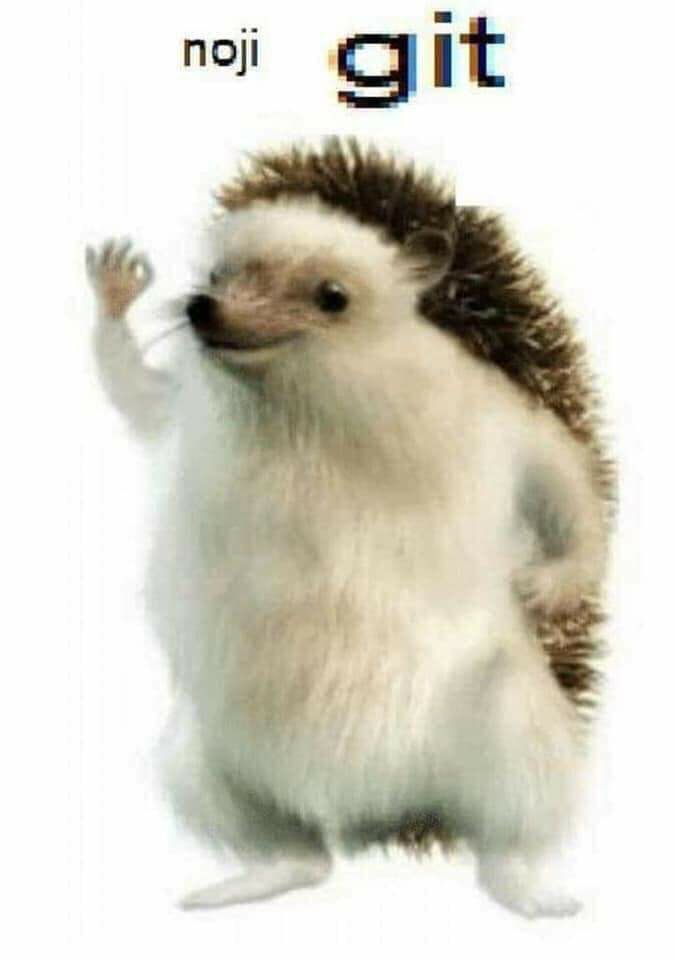